In [1]:
from sklearn.preprocessing import StandardScaler
import torch
data= torch.load("/home/wf/EEG_GTN/data/dataset/Processed_Dataset/seed/zero/de/data.pt")[0,0,0,:,1,:]
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)
standardized_data=data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
def plot_adj(adj):
    plt.subplots(figsize = (24,24))
    sns.set(font_scale=0.5)
    sns.heatmap(adj, 
                cbar=True, 
                square=True,
                annot=True, # 注入数字
                # fmt='.2f',   # 字符串格式代码
                annot_kws={'size': 4}, # 当annot为True时，ax.text的关键字参数，即注入数字的字体大小
                yticklabels=[i for i in range(0,62)],  # 列标签
                xticklabels=[i for i in range(0,62)],   # 行标签
                cmap = "Reds")
    plt.show()

In [4]:
import numpy as np
import torch
def keep_k_largest_edges(A, k):
    temp_A = A
    A = A.abs()
    A = A.triu()
    A = A.flatten()
    A = A.sort(descending=True).values
    threshold = A[k]
    temp_A = torch.where(temp_A.abs() >= threshold, temp_A, torch.tensor([1e-10]))
    return temp_A

import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

def calculate_adjacency_matrix(features, delta):
    """
    计算邻接矩阵
    公式: 
    $$
        \mathbf{A}_{i j}=\min \left(1, \\frac{\delta}{d_{i j}^2}\\right)
    $$

    参数:
    - features: 二维数组，表示图的节点特征矩阵，每行是一个节点的特征向量
    - delta: 阈值参数

    返回:
    - adjacency_matrix: 二维数组，表示计算得到的邻接矩阵
    """
    num_nodes = features.shape[0]
    adjacency_matrix = np.zeros((num_nodes, num_nodes))

    # 计算节点之间的欧氏距离
    distance_matrix = euclidean_distances(features, features)
    distance_matrix = np.where(distance_matrix < 1e-10, 1e-10, distance_matrix)

    # 根据公式计算邻接矩阵
    for i in range(num_nodes):
        for j in range(i, num_nodes):
            similarity = min(1, delta / (distance_matrix[i, j]**2))
            adjacency_matrix[i, j] = similarity
            adjacency_matrix[j, i] = similarity  # 邻接矩阵是对称的

    return adjacency_matrix

# 示例
# 假设 features 是一个节点特征矩阵，delta 是阈值参数
# features = ...
# delta = ...
# adjacency_matrix = calculate_adjacency_matrix(features, delta)


adj1=calculate_adjacency_matrix(standardized_data, 0.5)
# adj1=keep_k_largest_edges(torch.from_numpy(adj1),10)

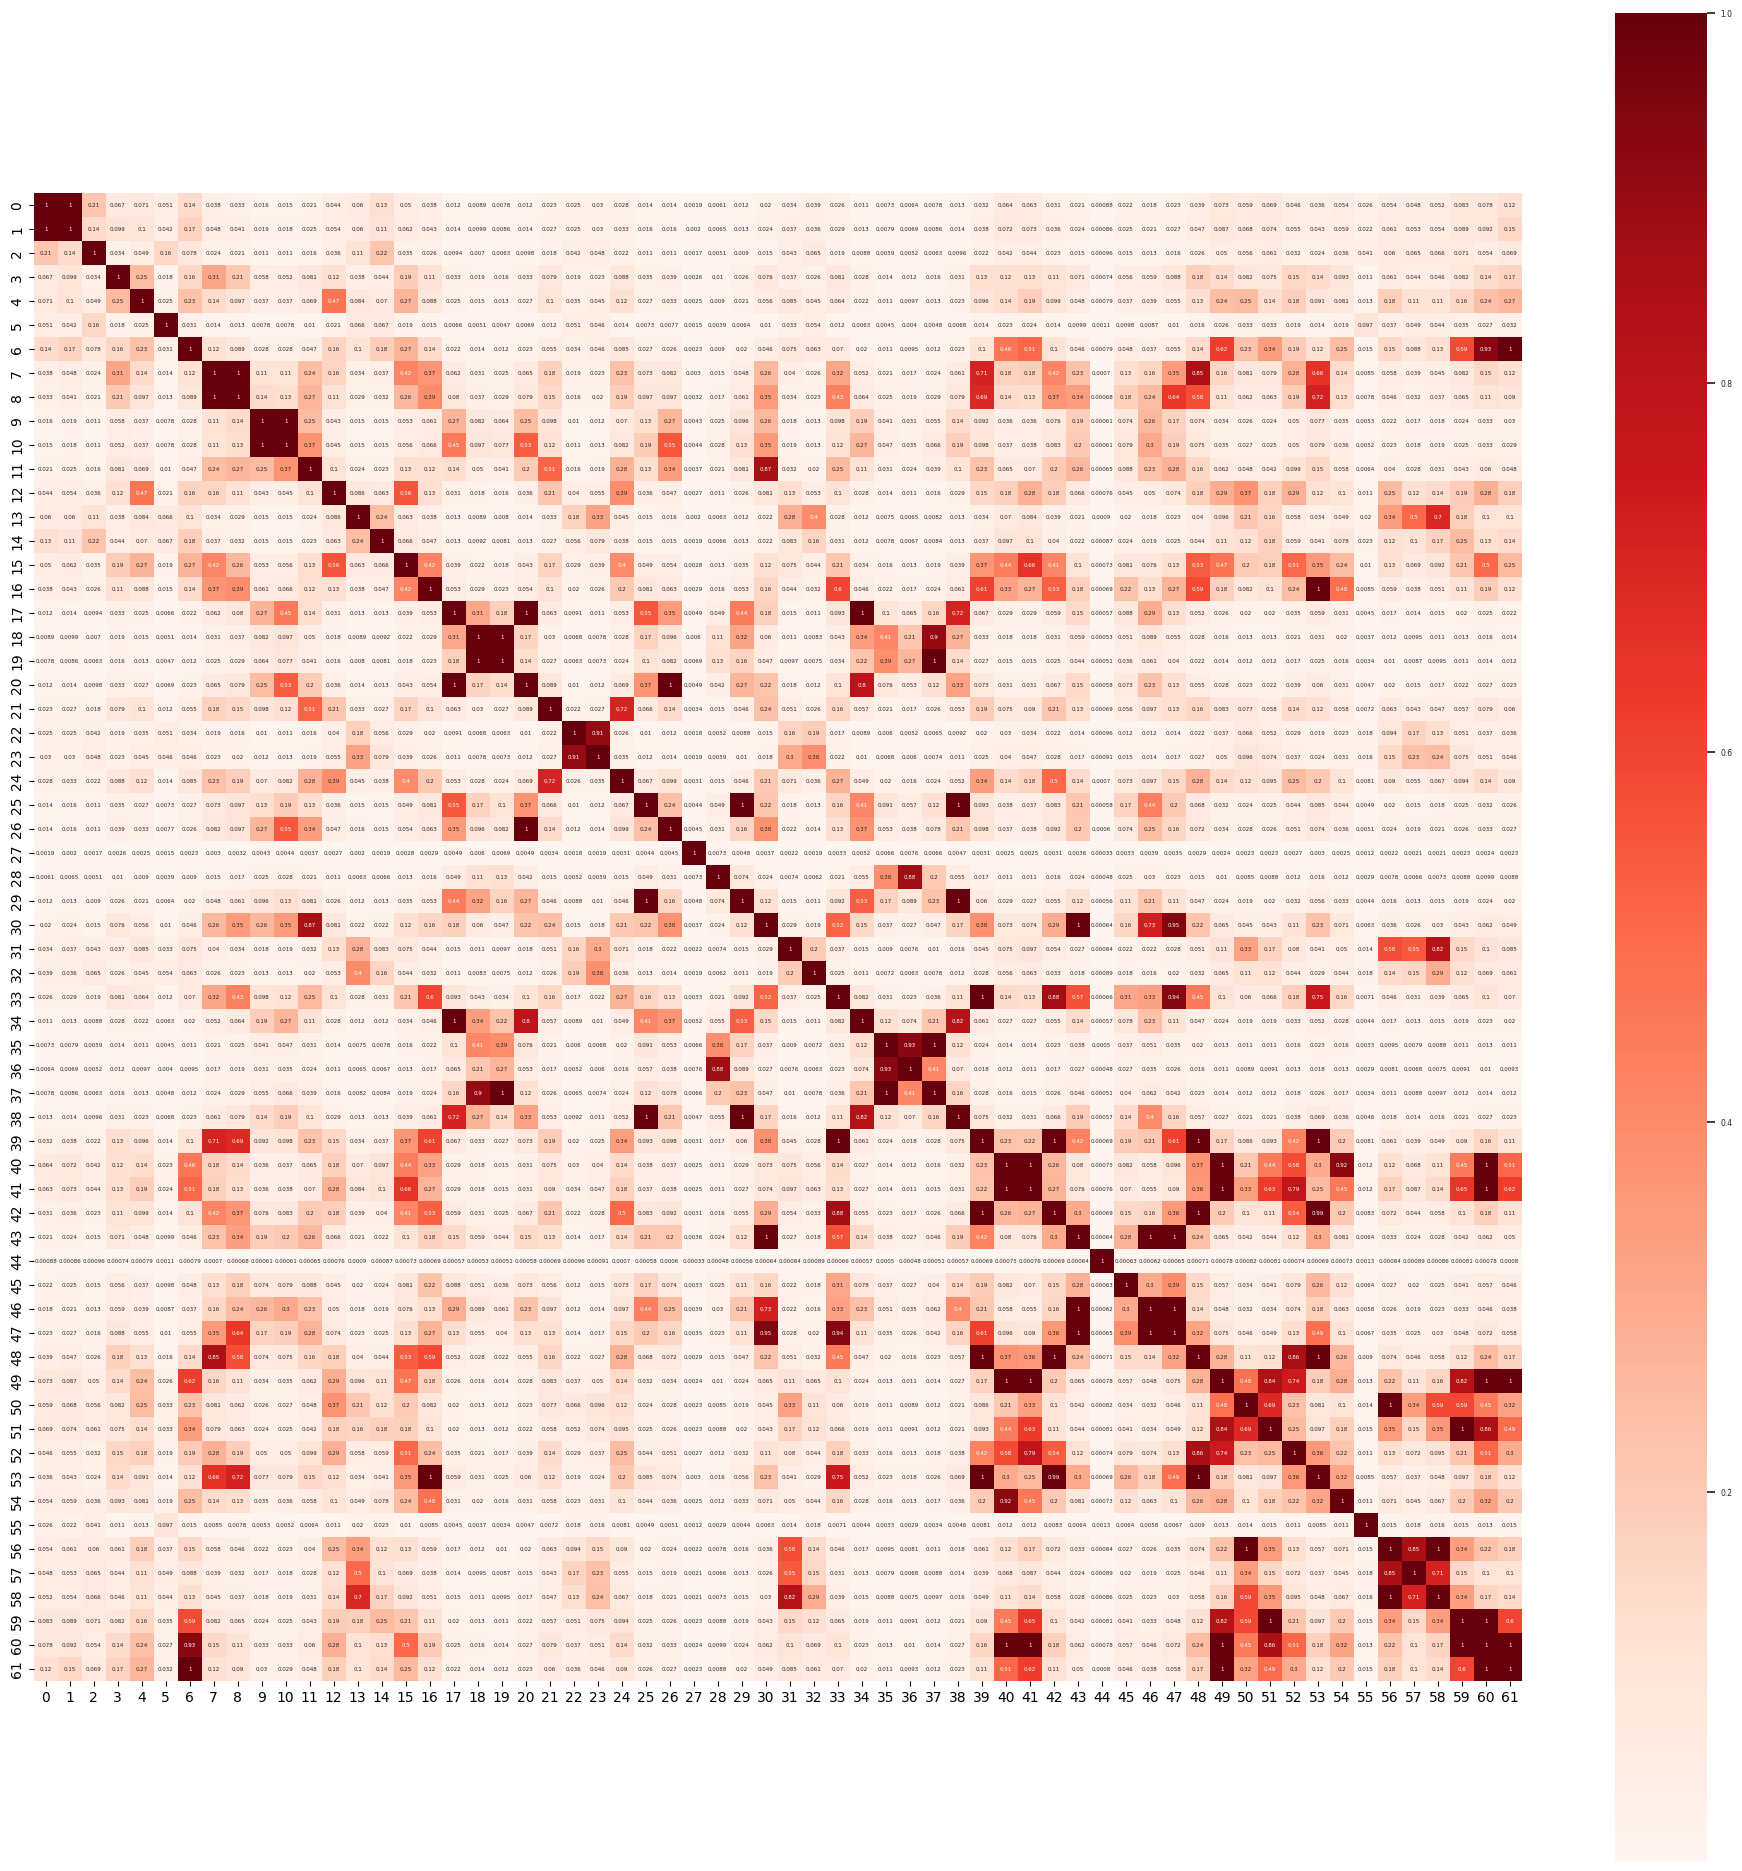

In [5]:

plot_adj(adj1)


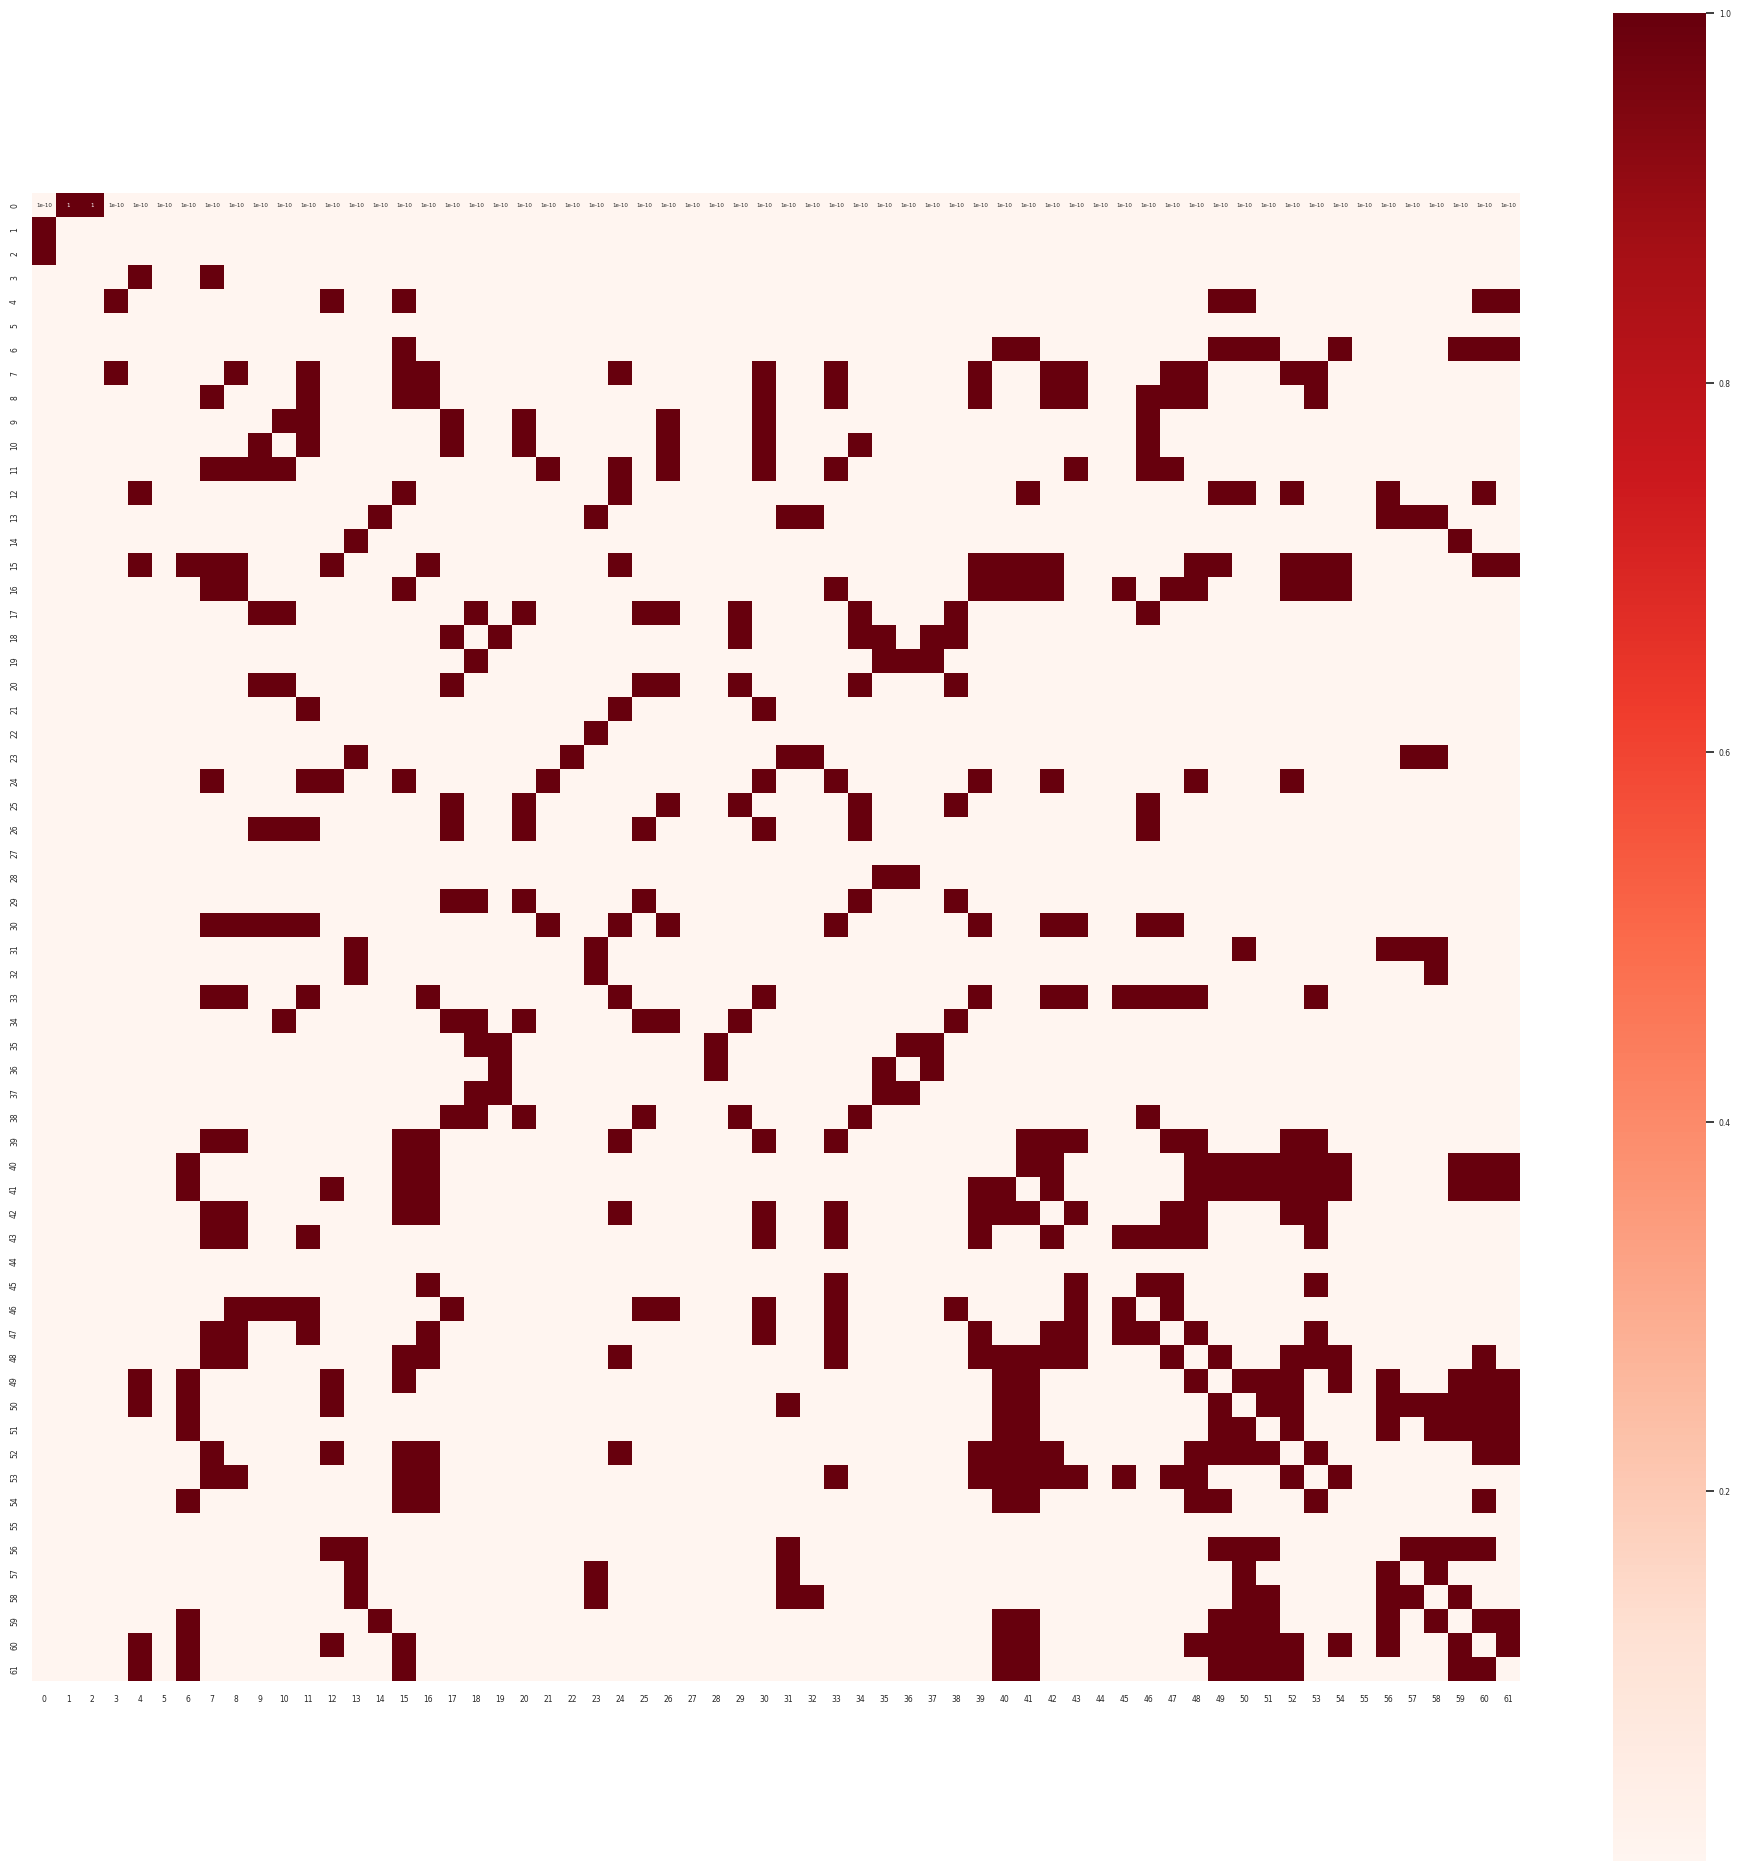

In [21]:
def calculate_weight_matrix_g(features, theta, tau):
    """
    计算权重矩阵

    参数:
    - features: 二维数组，表示图的节点特征矩阵，每行是一个节点的特征向量
    - theta: 控制高斯核宽度的参数
    - tau: 阈值参数

    返回:
    - weight_matrix: 二维数组，表示计算得到的权重矩阵
    """
    num_nodes = features.shape[0]
    weight_matrix = np.zeros((num_nodes, num_nodes))

    # 计算节点之间的欧氏距离
    distance_matrix = euclidean_distances(features, features)

    # 根据公式计算权重矩阵
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if distance_matrix[i, j] <= tau:
                weight = np.exp(- (distance_matrix[i, j]**2) / (2 * theta**2))
                weight_matrix[i, j] = weight
                weight_matrix[j, i] = weight  # 权重矩阵是对称的

    return weight_matrix

adj1=calculate_adjacency_matrix(standardized_data, 0.5)
adj1=keep_k_largest_edges(torch.from_numpy(adj1),10)
plot_adj(adj1)

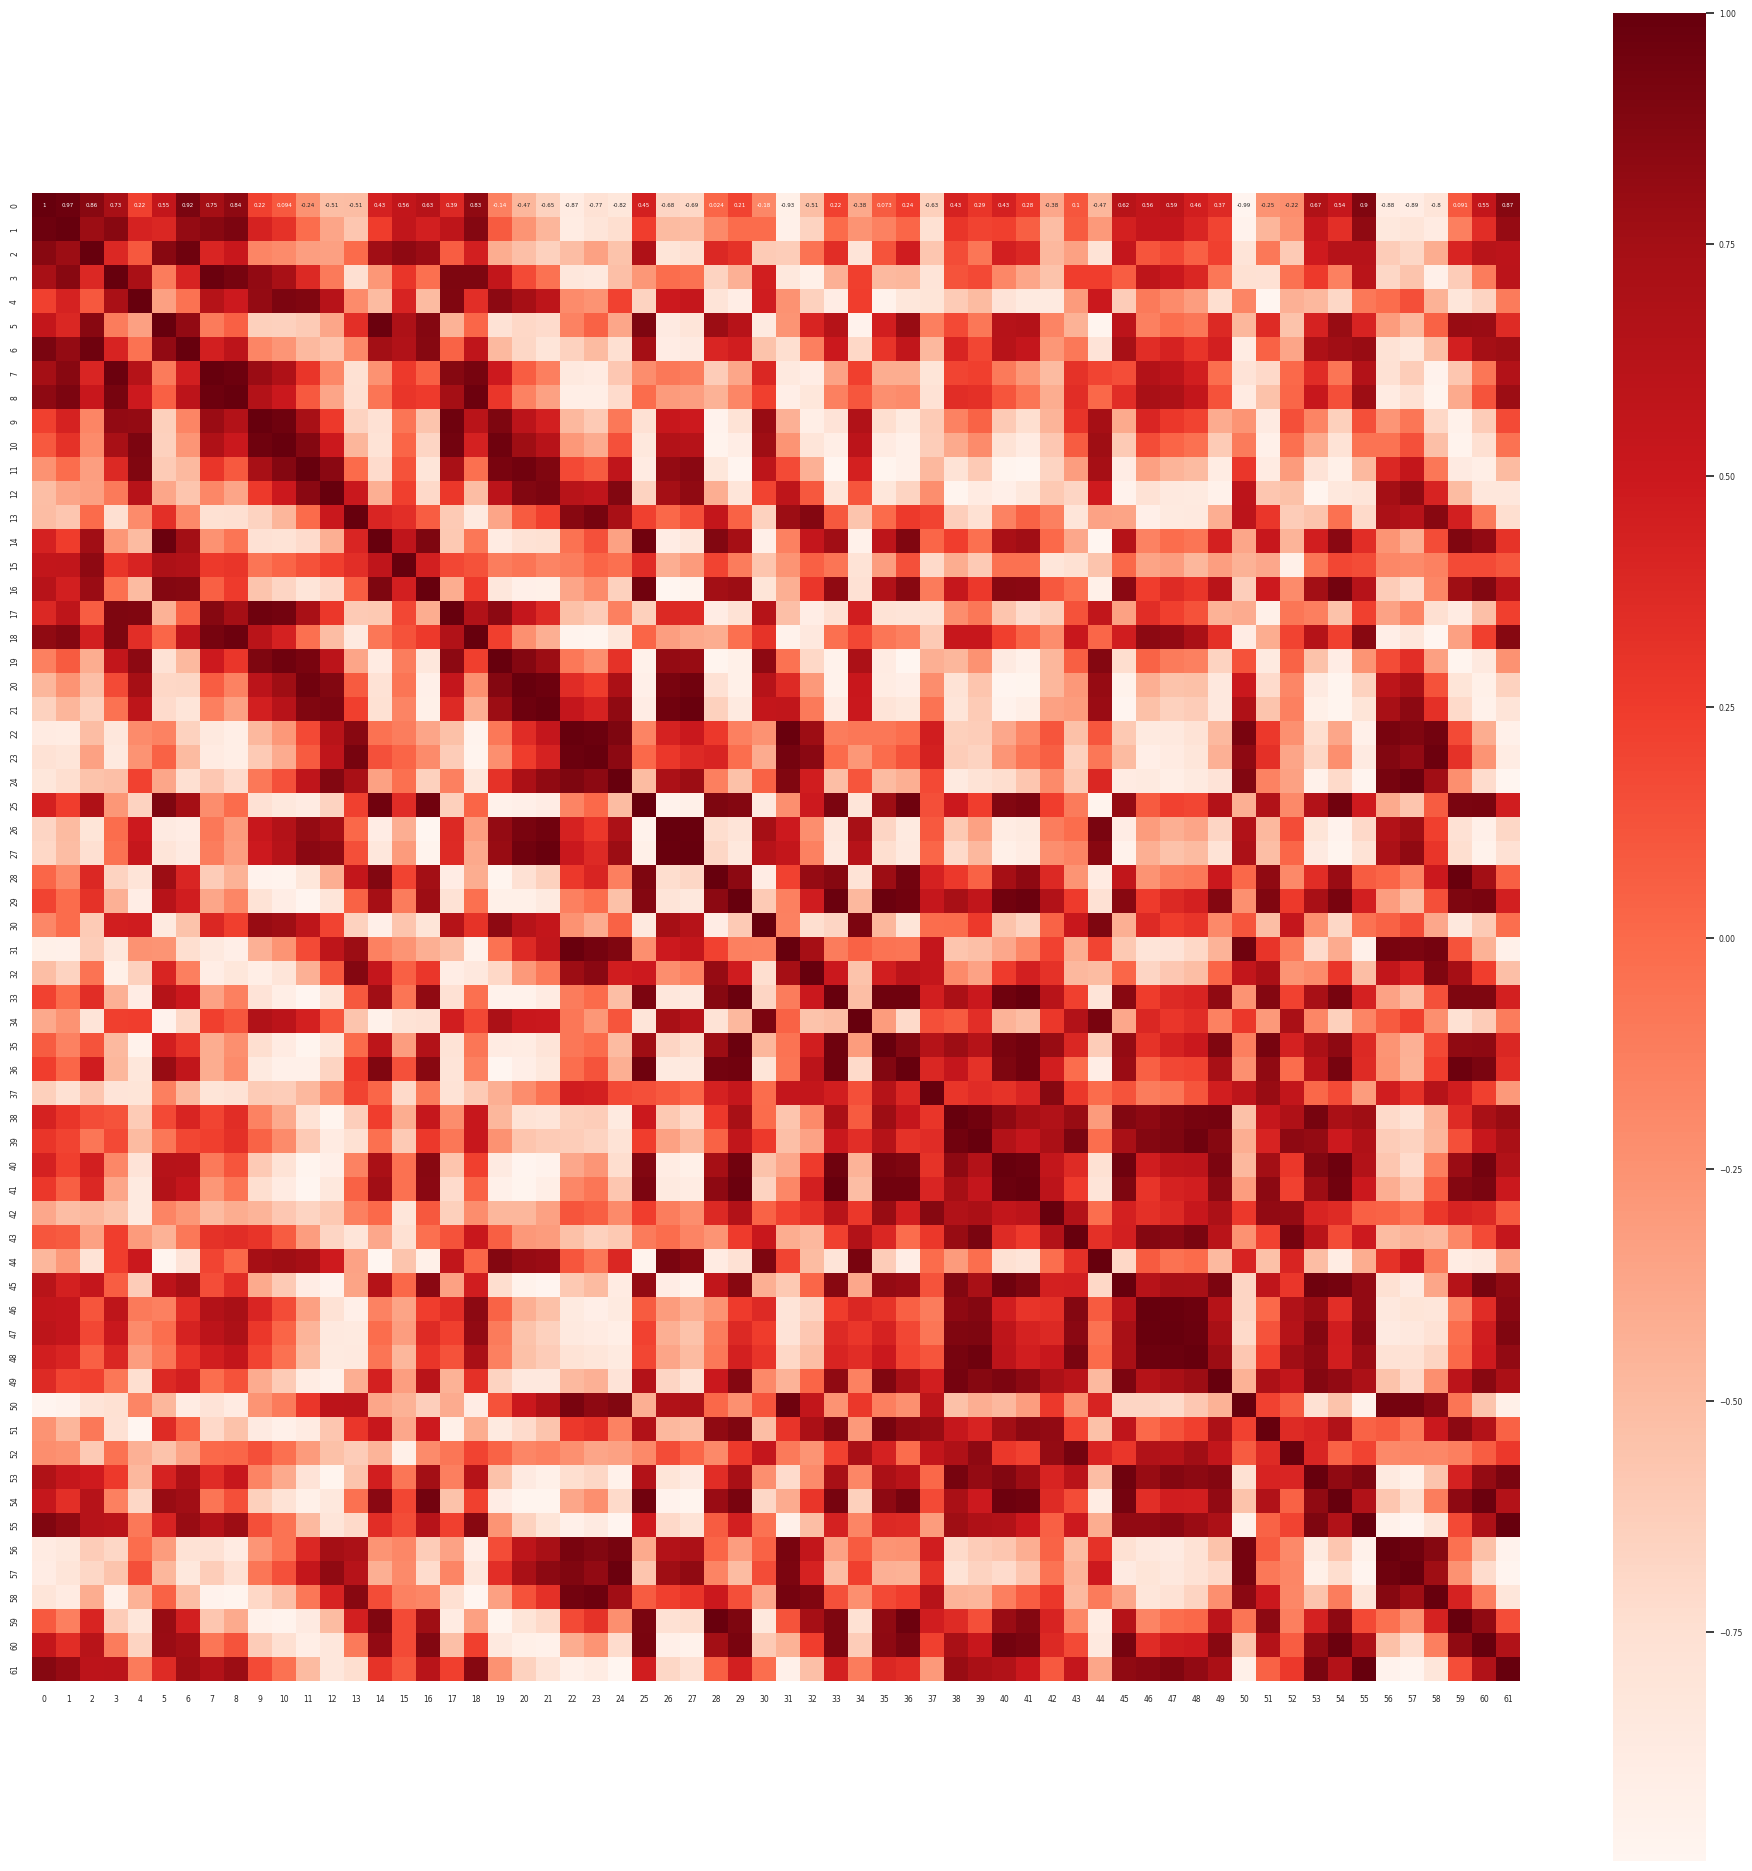

In [7]:
# 复杂网络度量：

# 基于复杂网络度量计算邻接矩阵。
import networkx as nx

def network_metrics_matrix(features):
    correlation_matrix = np.corrcoef(features)
    graph = nx.Graph(correlation_matrix)
    adjacency_matrix = nx.to_numpy_array(graph)
    return adjacency_matrix
adj3=network_metrics_matrix(standardized_data)
plot_adj(adj3)

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

def calculate_adjacency_matrix(features, delta):
    """
    计算邻接矩阵

    参数:
    - features: 二维数组，表示图的节点特征矩阵，每行是一个节点的特征向量
    - delta: 阈值参数

    返回:
    - adjacency_matrix: 二维数组，表示计算得到的邻接矩阵
    """
    num_nodes = features.shape[0]
    adjacency_matrix = np.zeros((num_nodes, num_nodes))

    # 计算节点之间的欧氏距离
    distance_matrix = euclidean_distances(features, features)

    # 根据公式计算邻接矩阵
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            similarity = min(1, delta / (distance_matrix[i, j]**2))
            adjacency_matrix[i, j] = similarity
            adjacency_matrix[j, i] = similarity  # 邻接矩阵是对称的

    return adjacency_matrix
